In [57]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [38]:
wine = pd.read_csv("https://bit.ly/wine-date")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [63]:
from sklearn.model_selection import train_test_split


In [64]:
X = wine[["alcohol", "sugar", "pH"]]
y = wine["class"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.2, random_state=42)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(5197, 3)
(1300, 3)
(5197,)
(1300,)


In [65]:
from sklearn.preprocessing import StandardScaler

In [67]:
mean = train_X.mean()
std = train_X.std()

train_scaled = (train_X - mean) / std
test_scaled = (test_X - mean) / std
print("훈련 데이터 차원:", train_scaled.shape)
print("훈련 레이블 차원:", train_y.shape)
print("테스트 데이터 차원:", test_scaled.shape)
print("테스트 레이블 차원:", test_y.shape)

훈련 데이터 차원: (5197, 3)
훈련 레이블 차원: (5197,)
테스트 데이터 차원: (1300, 3)
테스트 레이블 차원: (1300,)


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
train_scaled.shape
train_y.shape

knn = KNeighborsClassifier()
    
knn.fit(train_scaled, train_y)
print("train ACC", knn.score(train_scaled, train_y))
print("test ACC", knn.score(test_scaled, test_y))

train ACC 0.9016740427169521
test ACC 0.8346153846153846


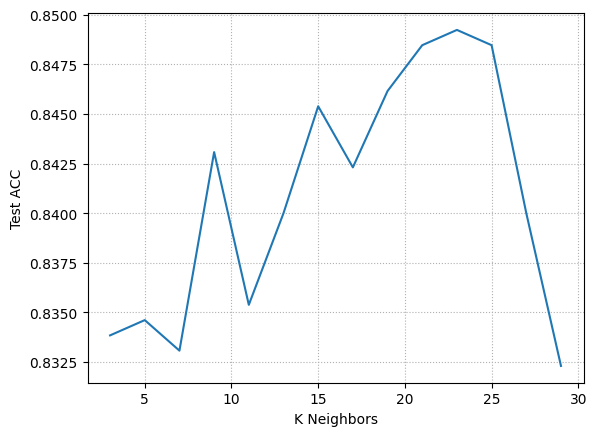

In [70]:
knn = KNeighborsClassifier()
score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)
        
plt.plot(n_list, score_list)
plt.grid(linestyle = ":")
plt.xlabel("K Neighbors")
plt.ylabel("Test ACC")
plt.show()